In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\PriyaSelvan\Downloads\Churn_Modelling (2).csv")

In [4]:
# Display the first few rows to inspect the data
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86   

In [5]:
# Check the shape of the dataset
print("\nDataset Shape (Rows, Columns):", df.shape)


Dataset Shape (Rows, Columns): (10000, 14)


In [6]:
# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [7]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [8]:
# Check for missing values
missing_values = df.isna().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [9]:
# Unique values in Geography column
print("\nUnique values in 'Geography' column:", df["Geography"].unique())


Unique values in 'Geography' column: ['France' 'Spain' 'Germany']


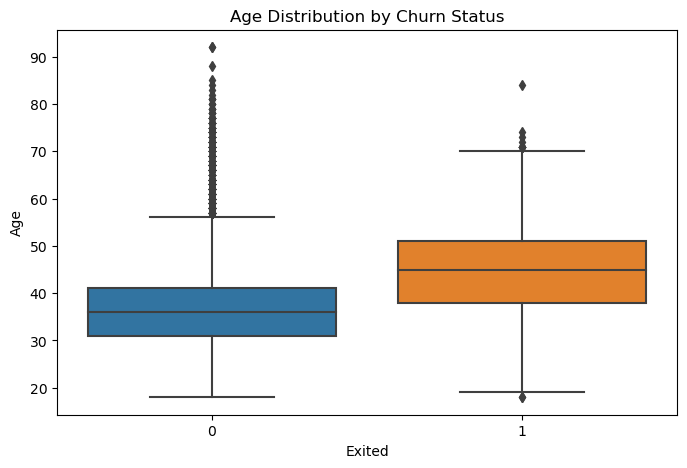

In [12]:
# Boxplot for churn vs age
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age Distribution by Churn Status")
plt.show()

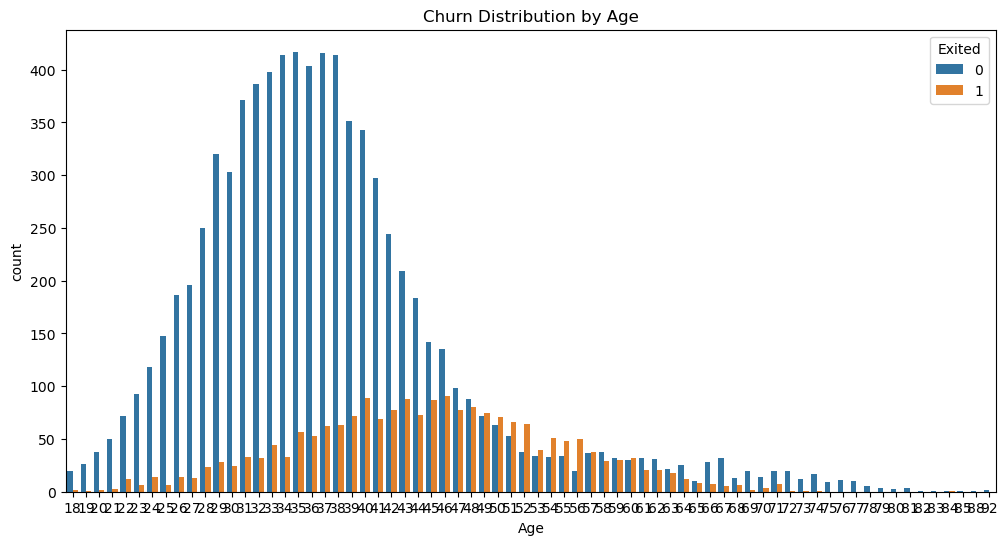

In [13]:
# Countplot for age with churn as a hue
plt.figure(figsize=(12, 6))
sns.countplot(x="Age", hue="Exited", data=df)
plt.title("Churn Distribution by Age")
plt.show()

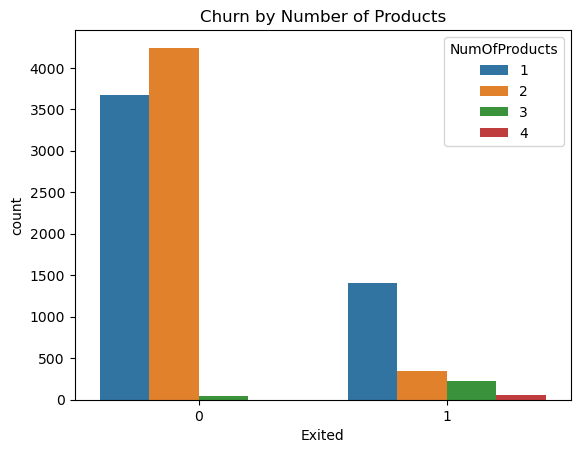

In [14]:
# Countplot for churn with products as a hue
sns.countplot(x="Exited", hue="NumOfProducts", data=df)
plt.title("Churn by Number of Products")
plt.show()


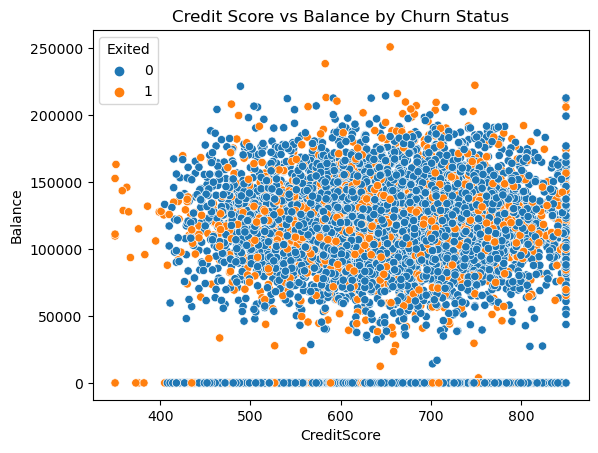

In [15]:
# Scatter plot for credit score vs balance
sns.scatterplot(x="CreditScore", y="Balance", hue="Exited", data=df)
plt.title("Credit Score vs Balance by Churn Status")
plt.show()

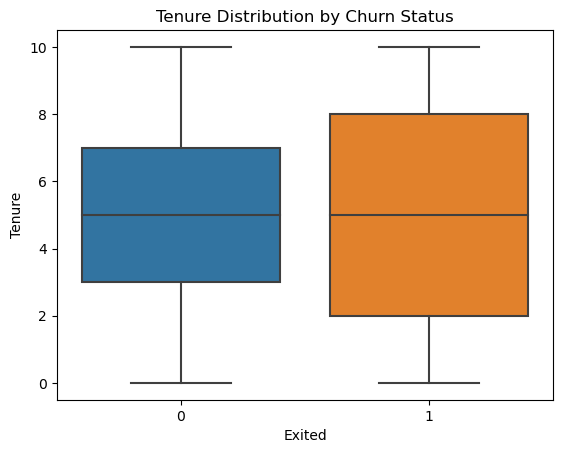

In [16]:
# Boxplot for tenure by churn
sns.boxplot(x="Exited", y="Tenure", data=df)
plt.title("Tenure Distribution by Churn Status")
plt.show()


In [17]:
# One-hot encoding for categorical variables (Geography and Gender)
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [18]:
# Drop irrelevant columns (RowNumber, CustomerId, Surname)
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [19]:
# Features and target variable
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


In [21]:
# Import models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [22]:
# Logistic Regression
model_lg = LogisticRegression(max_iter=200)
model_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_test)

print("\nLogistic Regression Classification Report")
print(classification_report(y_test, y_pred_lg))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1577
           1       0.45      0.06      0.10       423

    accuracy                           0.79      2000
   macro avg       0.62      0.52      0.49      2000
weighted avg       0.72      0.79      0.71      2000



In [24]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=2023)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("\nDecision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1577
           1       0.51      0.53      0.52       423

    accuracy                           0.79      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.80      0.79      0.79      2000



In [25]:
# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=2023)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("\nRandom Forest Classification Report")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1577
           1       0.76      0.48      0.59       423

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [26]:
# Accuracy comparison
print("\nModel Accuracy Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Model Accuracy Comparison:
Logistic Regression Accuracy: 0.7855
Decision Tree Accuracy: 0.793
Random Forest Accuracy: 0.8595
